In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
cd /content/drive/My Drive/AAIC

/content/drive/My Drive/AAIC


**Importing the necessary libraries**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as pplott

**Importing the dataset**

# **Haberman's cancer survival dataset**

In [0]:
dataset =pd.read_csv('haberman.csv')

# **About the dataset**

**As the descripition in its kaggle website tells us that it contains cases from a study which was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.**

In [157]:
dataset.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

No missing values can be seen in dataset

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Number of instances found in the dataset : **306**
Number of variables or columns present in the dataset :**4**
Namely - Age , Year , Nodes , Status.
The descripiton of each variable is as follows


1.   **Age** : The age of the person at the time of operation
2.   **Year**: The year of operation 
1.   **Nodes**: The number of auxillary nodes detected
2.   **Status**: The status of the survival of the person . It consists of two numerics 1 and 2 where 1 represents that the person has survived within 5 years of operation and 2 represents that the patient has died within 5 years of operation

All the variables are of numeric nature except the status variable.

P.S. As stated on https://www.medicalnewstoday.com/articles/319713.php
The axillary nodes are usually the first set of lymph nodes where breast cancer will spread.As a general rule, the more a cancer has spread from its starting point, the worse the prognosis may be for a person.







In [58]:
dataset.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


These stats says that around 75 % of people who were undergone the operation aged below 61 and 50% of people contain one or no auxillary nodes

In [59]:
dataset.values

array([[30, 64,  1,  1],
       [30, 62,  3,  1],
       [30, 65,  0,  1],
       ...,
       [77, 65,  3,  1],
       [78, 65,  1,  2],
       [83, 58,  2,  2]])

In [60]:
dataset.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [0]:
for i in range(0,306):
  if dataset.iloc[i,3]==1:
    dataset.iloc[i,3]='Survived'
  elif dataset.iloc[i,3]==2:
    dataset.iloc[i,3]='Died'

To be comfortable with the dataset, changing the classes of status from 1 and 2 to survived and died respectively.

In [0]:
dataset

In [65]:
print(dataset['status'].value_counts())
dataset['status'].value_counts(normalize='True')

Survived    225
Died         81
Name: status, dtype: int64


Survived    0.735294
Died        0.264706
Name: status, dtype: float64

**OBJECTIVE :**Our objective is to perform exploratory data analysis on the dataset to select a feature or multiple features that is/are helpful to classify the people.

We clearly see that 225 instances ( About 73.6%) of the data contains status as survived and rest of the data (26.4%) contains status as died.

To see which variables are useful to classify the patients , uni-variate , multi-variate and bi-variate anlysis should be done

# UNI-VARIATE ANALYSIS

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

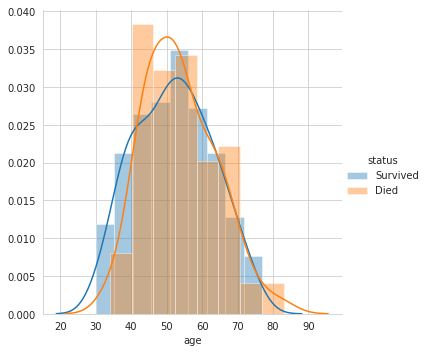

In [73]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue='status',height=5).map(sns.distplot,'age').add_legend()
plt

Clearly ,both the histograms of survived and died over the distribution of age are overlapping. So nothing useful can be found with the variable age.

But to mention as a point , most of the people died are aged between 35 and 70.

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

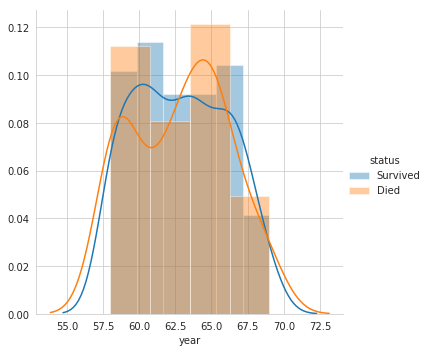

In [74]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue='status',height=5).map(sns.distplot,'year').add_legend()
plt

Same scenario with the variable year. Nothing useful can be seen for the purpose of classfication.

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

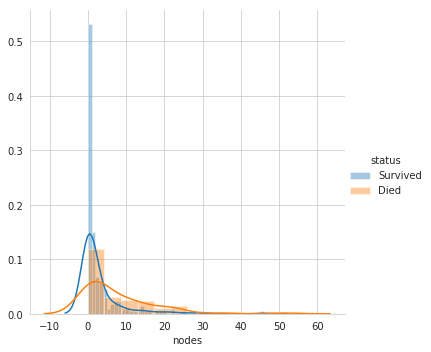

In [75]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue='status',height=5).map(sns.distplot,'nodes').add_legend()
plt

This plot sems interesting. Most of the people having 0 or 1 lymph nodes have survived.

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

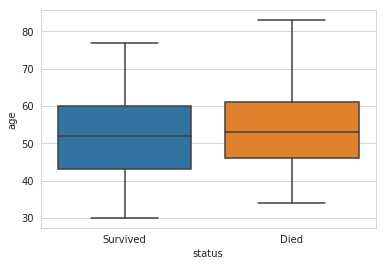

In [76]:
sns.boxplot(dataset['status'],dataset['age'])
plt

Similarly ,when we consider the box plot of the variable age both plots are almost the same. Hence age does not say anything about survival status.

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

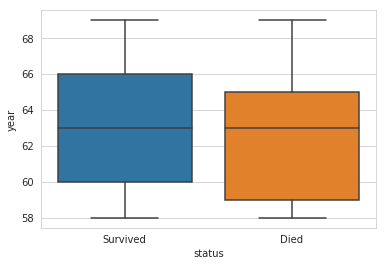

In [77]:
sns.boxplot(dataset['status'],dataset['year'])
plt

Similarly , year also has nothing to play.

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

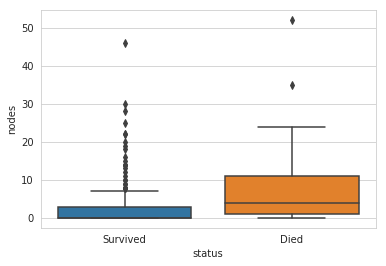

In [78]:
sns.boxplot(dataset['status'],dataset['nodes'])
plt

The plot states that the status of survival strongly depends on the variable nodes. People with less number of auxillary nodes are likely to survive.

# MULTI-VARIATE ANALYSIS

The combination of features may be helpful for the purpose of classification . The pair plot plots all possible plots between the variables . From the pair plot , useful plots can be selected.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

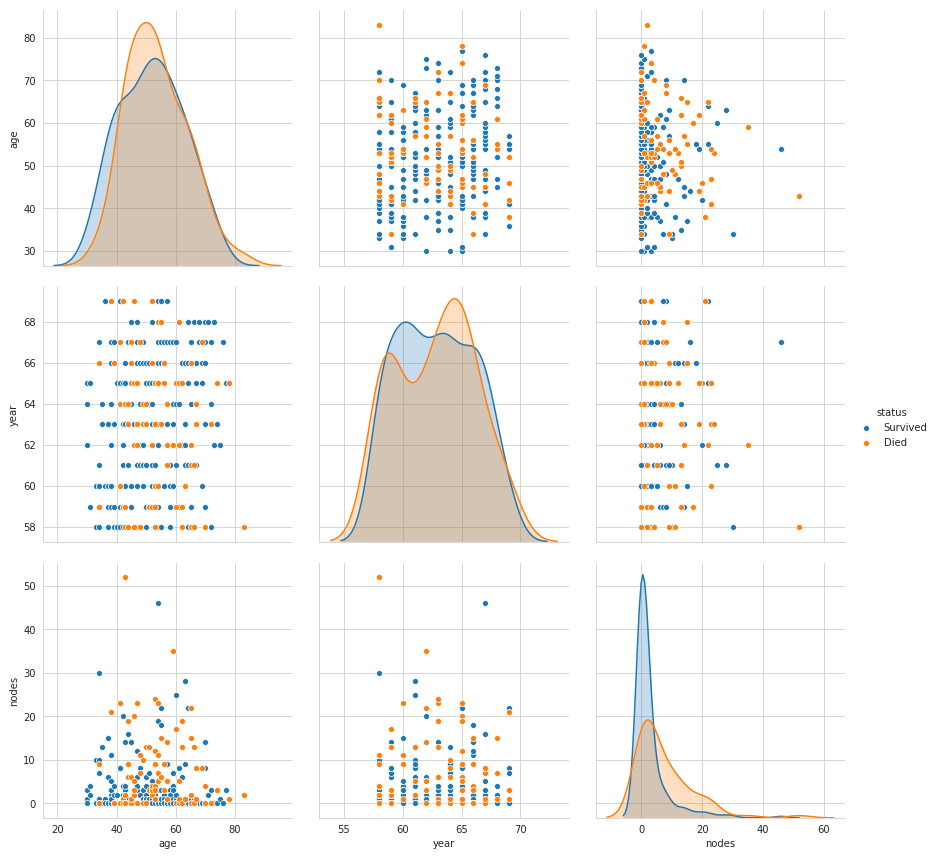

In [81]:
sns.set_style("whitegrid")
sns.pairplot(dataset,hue='status',size=4)
plt

Except 2 plots , all the other plots are not really useful for the purpose of classification.

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

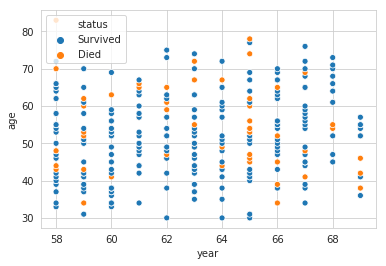

In [88]:
sns.scatterplot(dataset['year'],dataset['age'],hue=dataset['status'])
plt

This plot between age and year , although it doesnt states the survival status of the person , it do have some interesting things to say. 

1.Very few people were died between the age 30 to 50 whose operation was done during 1958 to 1964.

2.Almost everyone survived between the age 30 to 40 whose operation was done during 1958 to 1965.

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

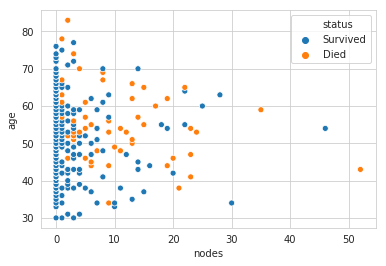

In [87]:
sns.scatterplot(dataset['nodes'],dataset['age'],hue=dataset['status'])
plt

The plot clearly states that the number of lymph nodes greatly effect the survival status. All of the people with 0 lymph nodes has survived.

<module 'matplotlib' from '/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py'>

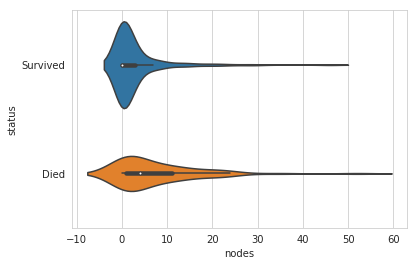

In [90]:
sns.violinplot(dataset['nodes'],dataset['status'])
plt

The violin plot states that people with more number of lymoh nodes has less chance of survival.

In [0]:
dataset_died=dataset[dataset["status"]=='Died']
dataset_survived=dataset[dataset["status"]=='Survived']



Splitting the data into 2 parts based on the survival status. This will be helpful while computing cdf and pdf.

In [153]:
dataset_survived.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


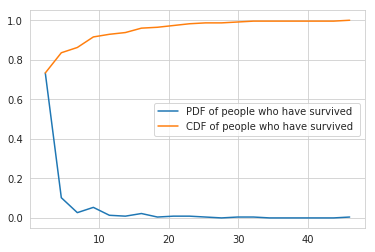

In [158]:
counts, bin_edges = np.histogram(dataset_survived['nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
sns.lineplot(bin_edges[1:],pdf,label = "PDF of people who have survived ")
sns.lineplot(bin_edges[1:], cdf, label = "CDF of people who have survived ")


The PDF clearly shows that people having more than 20 lymph nodes has low chance of survival.

[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


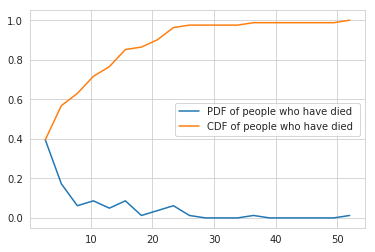

In [159]:
counts, bin_edges = np.histogram(dataset_died['nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
sns.lineplot(bin_edges[1:],pdf,label = "PDF of people who have died ")
sns.lineplot(bin_edges[1:], cdf, label = "CDF of people who have died ")

The PDF shows that people with more number of auxillary nodes has low chance of death. This is contradicting the previous assumption. The reason behind this is less number of data points with 10 or more auxillary nodes. Hence it doesnt mean that people with more number of nodes are likely to survive.

# **CONCLUSIONS**

By doing the Exploratory data analysis I conclude that except the variable 'nodes' , the rest of the variables are not really useful for the purpose of classification.

But they are useful for extracting some useful information which I have mentioned after each plot.

Even the combination of features are not helpful for classification of dead and survived.

So , to build a model that predicts whether a person dies or survives it requires only the  "number of nodes" . Nothing else matters.

In [162]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [163]:
!jupyter nbconvert --to PDF "sritejabanisetti21@gmail.com_1.ipynb"

[NbConvertApp] Converting notebook sritejabanisetti21@gmail.com_1.ipynb to PDF
[NbConvertApp] Support files will be in sritejabanisetti21@gmail.com_1_files/
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com_1_files
[NbConvertApp] Making directory ./sritejabanisetti21@gmail.com